In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
from utils import make_submit, base_model

In [3]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [4]:
# 인코딩

train_df = pd.get_dummies(train_df, columns=['주거 형태'])
test_df = pd.get_dummies(test_df, columns=['주거 형태'])

ordinal_mapping = {
    '1년 미만': 0,
    '1년': 1,
    '2년': 2,
    '3년': 3,
    '4년': 4,
    '5년': 5,
    '6년': 6,
    '7년': 7,
    '8년': 8,
    '9년': 9,
    '10년 이상': 10
}
train_df['현재 직장 근속 연수'] = train_df['현재 직장 근속 연수'].map(ordinal_mapping)
test_df['현재 직장 근속 연수'] = test_df['현재 직장 근속 연수'].map(ordinal_mapping)

train_df = pd.get_dummies(train_df, columns=['대출 목적'])
test_df = pd.get_dummies(test_df, columns=['대출 목적'])

train_df['대출 상환 기간'] = train_df['대출 상환 기간'].apply(lambda x: 0 if x == '단기 상환' else 1)
test_df['대출 상환 기간'] = test_df['대출 상환 기간'].apply(lambda x: 0 if x == '단기 상환' else 1)

In [5]:
train_df.columns

Index(['UID', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수',
       '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 상환 기간',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '채무 불이행 여부', '주거 형태_월세',
       '주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)',
       '대출 목적_결혼 자금', '대출 목적_고액 구매', '대출 목적_교육비', '대출 목적_기타', '대출 목적_부채 통합',
       '대출 목적_사업 대출', '대출 목적_소규모 사업 자금', '대출 목적_여행 자금', '대출 목적_의료비',
       '대출 목적_이사 비용', '대출 목적_자동차 구매', '대출 목적_주택 개보수', '대출 목적_주택 구매',
       '대출 목적_휴가 비용'],
      dtype='object')

In [ ]:
features = ['연간 소득', '개설된 신용계좌 수', '신용 거래 연수',
    '최대 신용한도', '마지막 연체 이후 경과 개월 수',
    '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수'
]
target = '채무 불이행 여부'

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = train_df[features]
y = train_df[target]

# 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78      1270
           1       0.64      0.31      0.42       730

    accuracy                           0.69      2000
   macro avg       0.67      0.61      0.60      2000
weighted avg       0.68      0.69      0.65      2000



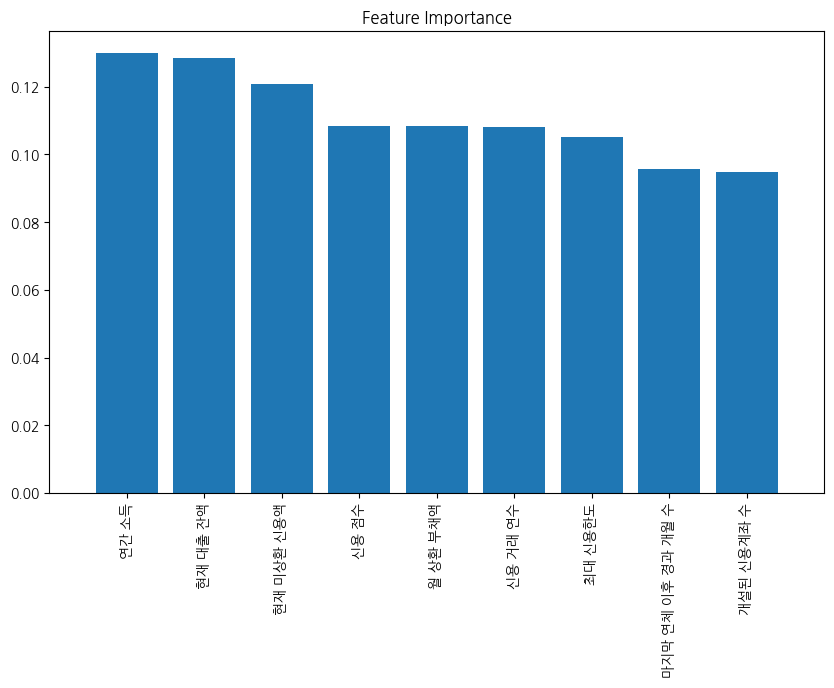

In [34]:
# 피처 중요도 계산
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # 중요도에 따라 정렬

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [35]:
make_submit(test_df, features, model)